In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

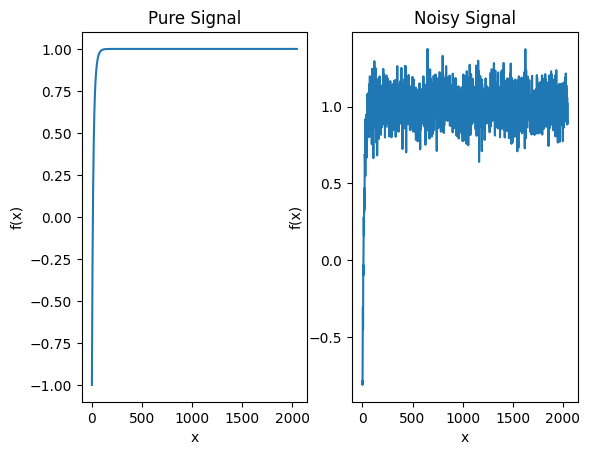

In [ ]:
# constants
e = math.e
t1 = 10
t2 = 20

# now generate noisy signal. do this by adding random noise onto pure signal

# generate pure signal
x = [i for i in range(2048)]
points = np.array([function(i,t1,t2) for i in x])

plt.subplot(1,2,1)
plt.plot(x, points)
plt.title('Pure Signal')
plt.xlabel('x')
plt.ylabel('f(x)')

# generate numpy array of noise
noise = np.random.normal(0,0.1,len(points))

# pure signal + noise = noisy signal
signal = np.add(points, noise)

plt.subplot(1,2,2)
plt.title('Noisy Signal')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, signal)

$\hat{y} = 1 - e^{-\frac{x}{t_1}} - e^{-\frac{x}{t_2}}$

In [ ]:
def function(x,t1,t2):
  return (1-e**(-x/t1)-e**(-x/t2))

Cost function I'm using:
$MSE = \frac{1}{n} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$

$\frac{\partial (cost)}{\partial t_1} = \frac{1}{n} \sum_{i=0}^n 2(y - (1 - e^{-\frac{x_i}{t_1}} - e^{-\frac{x_i}{t_2}}))(\frac{-x e^{-\frac{x}{t_1}}}{t_1^2})$

In [ ]:
def partial_t1_descent(t1):
  cost = 0
  n = len(x)
  for i in range(n):
    cost += 2 * (signal[i] - (1 - e**(-x[i]/t1) - e**(-x[i]/t2))) * (-x[i] * e**(-x[i]/t1)) / t1**2
  return cost / n

$\frac{\partial (cost)}{\partial t_2} = \frac{1}{n} \sum_{i=0}^n 2(y - (1 - e^{-\frac{x_i}{t_1}} - e^{-\frac{x_i}{t_2}}))(\frac{-x e^{-\frac{x}{t_2}}}{t_2^2})$

In [ ]:
def partial_t2_descent(t2):
  cost = 0
  n = len(x)
  for i in range(n):
    cost += 2 * (signal[i] - (1 - e**(-x[i]/t1) - e**(-x[i]/t2))) * (-x[i] * e**(-x[i]/t2)) / t2**2
  return cost / n

In [ ]:
# assigning random values for t1, t2 at the start
t1 = random.uniform(0,10)
t2 = random.uniform(0,20)

print(t1,t2)

7.552852629558192 7.706410993473738


In [ ]:
iterations = 1000

for i in range(iterations):

  # calculate partial derivatives
  cost_t1 = partial_t1_descent(t1)
  cost_t2 = partial_t2_descent(t2)

  # step size to change t1 and t2
  step_size = 1000
  t1 = t1 + step_size * cost_t1
  t2 = t2 + step_size * cost_t2
  print('T1 coefficient: {}, T2 coefficient: {}, t1 cost: {}, t2 cost: {}'.format(t1, t2, cost_t1, cost_t2))


T1 coefficient: 7.8822494781310875, T2 coefficient: 8.034689810554692, t1 cost: 0.0003293968485728954, t2 cost: 0.0003282788170809533
T1 coefficient: 8.188668132018392, T2 coefficient: 8.340041204377913, t1 cost: 0.0003064186538873049, t2 cost: 0.0003053513938232217
T1 coefficient: 8.474550270889313, T2 coefficient: 8.624911299236139, t1 cost: 0.00028588213887092024, t2 cost: 0.0002848700948582252
T1 coefficient: 8.74196725240586, T2 coefficient: 8.891372728349559, t1 cost: 0.0002674169815165467, t2 cost: 0.0002664614291134201
T1 coefficient: 8.992692639117395, T2 coefficient: 9.141198453552633, t1 cost: 0.00025072538671153425, t2 cost: 0.0002498257252030737
T1 coefficient: 9.228257632528493, T2 coefficient: 9.375917988483435, t1 cost: 0.00023556499341109756, t2 cost: 0.00023471953493080236
T1 coefficient: 9.449994055097063, T2 coefficient: 9.596860867273964, t1 cost: 0.00022173642256857016, t2 cost: 0.00022094287879052908
T1 coefficient: 9.659068109809866, T2 coefficient: 9.8051907058

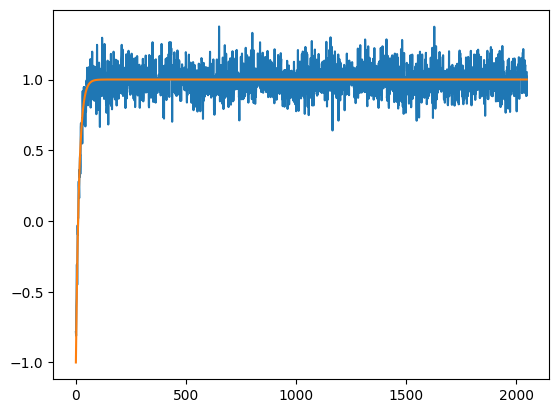

In [ ]:
new_points = [function(i, t1, t2) for i in x]
plt.plot(x, signal)
plt.plot(x, new_points)